<a href="https://colab.research.google.com/github/SUMIT74184/Machine-learning-journey/blob/main/NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02.Neural Network classification with pytorch

Classification is a problem of predicting whether something is one thing or another thing( there ca be multiple things as the options)

In [1]:
import torch

## 1. Make classification data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# make 1000 samples
n_Samples = 1000

# Create circles
X,y =make_circles(n_Samples,
                   noise=0.03,
                   random_state=42
                   )

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"Frist 5 samples of x:{X[:5]}")
print(f"First 5 samples of y:{y[:5]}")

Frist 5 samples of x:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [6]:
# Make DataFrame of circle data
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y
                        })

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


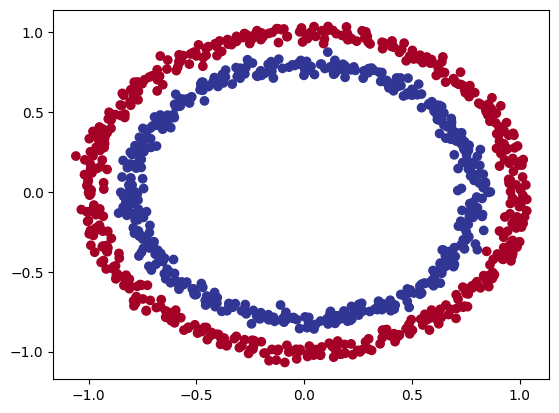

In [7]:
# Vislualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
            )

**Note**: The data we're working with is often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [8]:
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X = torch.tensor(X, dtype=torch.float32, device=device)

In [12]:
 # Turn data into tensors
X=torch.as_tensor(X).type(torch.float)
y=torch.as_tensor(y).type(torch.float)

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]], device='cuda:0'),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               train_size=0.8, # 0.2=20% of the data and 80% for the taining set
                                               random_state=42
                                               )


In [15]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [16]:
n_Samples

1000

## 2.Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:

1. setup device agnostic code so our code wil run on an accelerator (GPU) if there is one

2. Construct a model (by subclassing `nn.Module`)

3. Define a loss FUnction and Optimizer

4. Create a training and test loop


In [17]:
from torch import nn
## Make device agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code,lets create the model that:

1. Subclasses `nn.Module` (almost all models in Pytorch subclass `nn.Module`)

2. Create `nn.Linear()` layers that are capable of handling the shapes of our data

3. Defines a `Forward()` method that outlines the forward pass (or forward computation) of the model

4. Instatiate an instance of our model class and send it to the target `device`




In [18]:
X_train.shape

torch.Size([800, 2])

In [19]:
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2 . Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5) # takes in 2 Features and upscales to 5 features
    self.layer_2=nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layers and outputs a single feature(same shape as y)

  # Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1->layer_2 -> output

 # 4 .Instatiate an instance of our model class and send it to the target device

model_0=CircleModelV0().to(device)

model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Let's replicate the model above using nn.Sequential
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)

).to(device)

In [23]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4727, -0.2202],
                      [-0.3232,  0.3161],
                      [ 0.0600, -0.3626],
                      [ 0.6297,  0.5500],
                      [-0.1579, -0.2187]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1783, -0.5222,  0.5908, -0.6493, -0.6236], device='cuda:0')),
             ('1.weight',
              tensor([[0.3639, 0.2500, 0.1315, 0.3650, 0.3342]], device='cuda:0')),
             ('1.bias', tensor([-0.0145], device='cuda:0'))])

In [25]:
# Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)},shape:{untrained_preds.shape}")
print(f"Length of test samples:{len(X_test)},shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200,shape:torch.Size([200, 1])
Length of test samples:200,shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.4976],
        [-0.3679],
        [-0.6668],
        [-0.4504],
        [-0.3954],
        [-0.3183],
        [-0.1680],
        [-0.1557],
        [-0.6780],
        [-0.3562]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

which loss function or optimizer should you use?

Again....this is the problem specific.

For exp - regression you might want MAE orMSE (mean absoute error or mean squared error)

For classification you might want cross entropy or categorical cross entropy

The loss function measures How **wrong** our predictions are

For optimizers, two of the most common and useful `SGD` and  `Adam`

* For the loss function we're going to use `torch.nn.BECWithLogisticLoss()` , for more on what binary cross entropy (BCE)

* For different optimizers see torch.optim




In [26]:
## Setup the loss function
# loss_fn=nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1

                          )

In [27]:
# Calculate accuracy - out of 100 exampes, what percentage does out model get right?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


## 3.Train Model

To train our model, we're going to need to build a training loops

1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. optimizer step (gradient descent)


### 3.1 Going from raw logits --> prediction probabilities --> prediction labels

our model outputs are going to be raw **logits**.

we can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g.sigmoid for binary crossentropy and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [28]:
# View the first 5 outputts of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4976],
        [-0.3679],
        [-0.6668],
        [-0.4504],
        [-0.3954]], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
# Use  the sigmoid activation function on our model logits to tur them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.3781],
        [0.4091],
        [0.3392],
        [0.3893],
        [0.4024]], device='cuda:0')

For our prediction probability  value, we need to perform a range-styple rounding on them:

*`y_pred_probs`>=0.5, y=1 , class 1

*`y_pred_probs` <0.5 , y=0 class 0

In [31]:
# Find the predicted labels
y_preds=torch.round(y_pred_probs)


#In full (logits -> pred probs -->pred labels)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


# torch.round(y_pred_probs)

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and testing loop

In [32]:
device

'cuda'

In [33]:
torch.manual_seed(42)

# set the number of epochs
epochs = 1000

# Put the data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)


#Building training and evaluation loop
for epoch in range(epochs):
  ## training
  model_0.train()

  # 1 forward pass
  y_logits=model_0(X_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logits)) # turn logits->pred probs -> pred labels

  # 2 calculate loss/accuracy
 # loss = loss_fn(torch.sigmoid(y_logits)) ## nn.BCELoss expects prediction probabilities as input


  loss=loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
               y_train)

  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred
                  )

  # Optimizer zero grad
  optimizer.zero_grad()

  # 4 loss backward
  loss.backward()

  # 5 Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
      #1 Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # 2 calculate test loss/acc
      test_loss = loss_fn(test_logits,y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred
                             )
  # Prinnt out what's happenin
  if epoch % 10 ==  0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test loss:{test_loss:.5f},test acc: {test_acc:.2f}%")


Epoch:0 | Loss:0.72114, Acc:50.00% | Test loss:0.72226,test acc: 50.00%
Epoch:10 | Loss:0.70144, Acc:41.62% | Test loss:0.70405,test acc: 41.00%
Epoch:20 | Loss:0.69669, Acc:48.62% | Test loss:0.69911,test acc: 44.00%
Epoch:30 | Loss:0.69531, Acc:49.12% | Test loss:0.69740,test acc: 48.00%
Epoch:40 | Loss:0.69474, Acc:49.38% | Test loss:0.69660,test acc: 49.00%
Epoch:50 | Loss:0.69441, Acc:49.25% | Test loss:0.69611,test acc: 49.50%
Epoch:60 | Loss:0.69417, Acc:49.38% | Test loss:0.69576,test acc: 49.00%
Epoch:70 | Loss:0.69398, Acc:50.12% | Test loss:0.69549,test acc: 49.50%
Epoch:80 | Loss:0.69383, Acc:49.88% | Test loss:0.69527,test acc: 50.00%
Epoch:90 | Loss:0.69370, Acc:49.75% | Test loss:0.69510,test acc: 50.00%
Epoch:100 | Loss:0.69359, Acc:49.50% | Test loss:0.69496,test acc: 50.50%
Epoch:110 | Loss:0.69350, Acc:49.50% | Test loss:0.69484,test acc: 50.50%
Epoch:120 | Loss:0.69342, Acc:49.88% | Test loss:0.69475,test acc: 49.50%
Epoch:130 | Loss:0.69336, Acc:49.75% | Test loss:

## 4. Make predictions and evaluate the model

From thee mertics it looks like our model isn't learning anything....

so to inspect it let's make some predictions and make them visual!

In other words, 'Visualize it"

To do so, we're going to import a function called `plot_decision_boundary()`

In [34]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper_functions.py


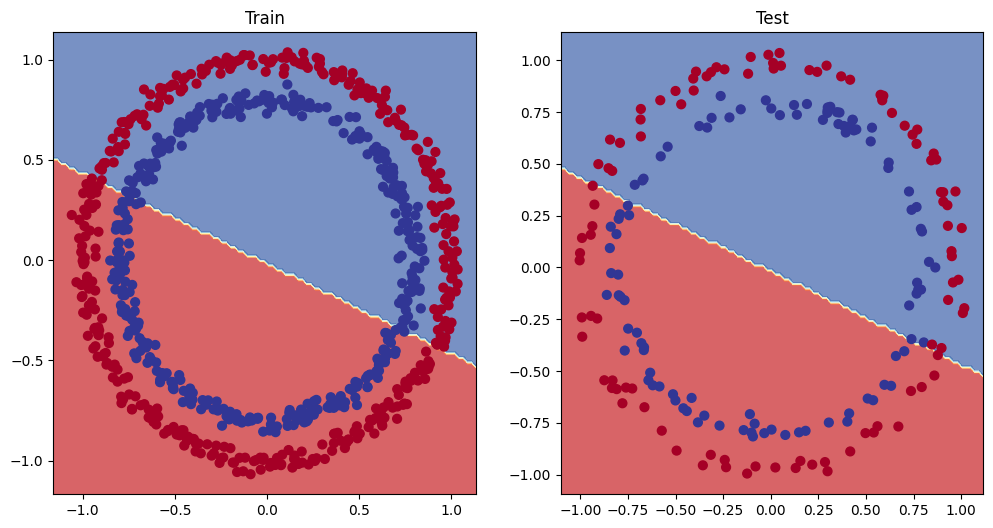

In [35]:
# Plot decision boundary boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving a model (from a model prespective)

* Add more layers - give the model more chances to learn about patterns in the data

* Add more hidden units - go from 5 units to 10 hidden units

* Fit for longer

* changing the activation functions

* change the learning rate--->exploding gradient problem

* Change the loss function



In [35]:
model_0=nn.Sequential(
    nn.Linear()
)